# Self-Refine en Fashion MNIST

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# Datos

In [3]:
# Cargar Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.17, random_state=42, stratify=y_train
)

In [12]:
print("Train: ",x_train_split.shape)
print("Validation: ",x_val.shape)
print("Test: ",x_test.shape)

Train:  (49800, 28, 28)
Validation:  (10200, 28, 28)
Test:  (10000, 28, 28)


# Modelo 1: Multicapa

In [13]:
# Definir la red neuronal
def crear_modelo():
    modelo = Sequential([
        Flatten(input_shape=(28, 28)),  # Convertir imagen 28x28 en vector
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  # 10 clases
    ])
    modelo.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return modelo

# Inicializar modelo
modelo = crear_modelo()
modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1749381850.075468      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749381850.076207      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Trainning

In [14]:
# Entrenar inicialmente
modelo.fit(x_train_split, y_train_split, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5


I0000 00:00:1749381907.095503     101 service.cc:148] XLA service 0x7a0eac004440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749381907.096055     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749381907.096081     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749381907.288367     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


  77/1557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5184 - loss: 1.4259

I0000 00:00:1749381908.171504     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1557/1557 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7731 - loss: 0.6581 - val_accuracy: 0.8647 - val_loss: 0.3851
Epoch 2/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8592 - loss: 0.3873 - val_accuracy: 0.8606 - val_loss: 0.3839
Epoch 3/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8705 - loss: 0.3499 - val_accuracy: 0.8825 - val_loss: 0.3267
Epoch 4/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8840 - loss: 0.3176 - val_accuracy: 0.8727 - val_loss: 0.3475
Epoch 5/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8867 - loss: 0.3072 - val_accuracy: 0.8822 - val_loss: 0.3253


In [15]:
# Evaluar desempeño final
loss, acc = modelo.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Precisión final antes de refinamiento: {acc * 100:.2f}%")


✅ Precisión final antes de refinamiento: 86.53%


## Self Refine

In [16]:
# Definir modelo UNA VEZ (fuera del bucle)
modelo = crear_modelo()  # Inicializar solo una vez

# Entrenamiento inicial
modelo.fit(x_train_split, y_train_split, epochs=5, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7660 - loss: 0.6713 - val_accuracy: 0.8599 - val_loss: 0.3819
Epoch 2/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8582 - loss: 0.3832 - val_accuracy: 0.8647 - val_loss: 0.3643
Epoch 3/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8712 - loss: 0.3450 - val_accuracy: 0.8586 - val_loss: 0.3854
Epoch 4/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8825 - loss: 0.3165 - val_accuracy: 0.8847 - val_loss: 0.3171
Epoch 5/5
1557/1557 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8868 - loss: 0.3035 - val_accuracy: 0.8706 - val_loss: 0.3522


In [34]:

def get_predictions(x_train):
    # Obtener predicciones
    predicciones = modelo.predict(x_train, verbose=0)
    predicciones_clases = np.argmax(predicciones, axis=1)
    predicciones_confianza = np.max(predicciones, axis=1)

    return predicciones_clases,predicciones_confianza

def get_index_predictions(iteracion,predicciones_clases,predicciones_confianza,y_train):
    # 1. Filtrar ejemplos correctos y de alta confianza (threshold dinámico)
    umbral_confianza = 0.7 + 0.1 * iteracion  # Aumentar umbral en cada iteración
    mascara = (predicciones_clases == y_train) & (predicciones_confianza > umbral_confianza)
    indices_correctos= np.where(mascara)[0]
    indices_incorrectos = np.where(predicciones_clases != y_train)[0]
    return indices_correctos,indices_incorrectos

# 🔹 Self-Refine
for iteracion in range(3):
    print(f"\n🔄 Refinamiento {iteracion + 1}...\n")

    predicciones_clases,predicciones_confianza = get_predictions(x_train_split)
    indices_correctos, indices_incorrectos = (
        get_index_predictions(
            iteracion,
            predicciones_clases,
            predicciones_confianza,
            y_train_split
        )
    )
    
    # Asegurar que no intentamos seleccionar más de lo disponible
    num_muestras = min(len(indices_incorrectos), max(1, len(indices_correctos)//4))

    if num_muestras > 0:
        muestras_incorrectas = np.random.choice(indices_incorrectos, size=num_muestras, replace=False)
    else:
        muestras_incorrectas = np.array([])  # No hay muestras incorrectas disponibles

    # 3. Combinar datos filtrados + muestras difíciles + datos originales
    indices_combinados = np.concatenate([indices_correctos, muestras_incorrectas])
    
    x_train_refinado = np.concatenate([x_train_split[indices_combinados], x_train_split])  # 50% filtrados, 50% originales
    y_train_refinado = np.concatenate([y_train_split[indices_combinados], y_train_split])

    # 4. Mezclar los datos combinados
    indices_mezclados = np.random.permutation(len(x_train_refinado))
    
    x_train_refinado = x_train_refinado[indices_mezclados]
    y_train_refinado = y_train_refinado[indices_mezclados]

    # 5. Re-entrenar SIN reinicializar el modelo (transfer learning)
    modelo.fit(x_train_refinado,
               y_train_refinado, 
               epochs=3,  # Menos épocas
               batch_size=32, 
               validation_data=(x_val, y_val))

    loss, acc = modelo.evaluate(x_test, y_test, verbose=0)
    print(f"\n✅ Precisión después del refinamiento: {acc * 100:.2f}%")

# Evaluación final
loss, acc = modelo.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Precisión final después de refinamiento: {acc * 100:.2f}%")


🔄 Refinamiento 1...

Epoch 1/3
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8997 - loss: 0.2692 - val_accuracy: 0.8750 - val_loss: 0.3447
Epoch 2/3
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9049 - loss: 0.2489 - val_accuracy: 0.8925 - val_loss: 0.3021
Epoch 3/3
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9123 - loss: 0.2272 - val_accuracy: 0.8877 - val_loss: 0.3218

✅ Precisión después del refinamiento: 87.32%

🔄 Refinamiento 2...

Epoch 1/3
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9201 - loss: 0.2064 - val_accuracy: 0.8880 - val_loss: 0.3126
Epoch 2/3
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9237 - loss: 0.1969 - val_accuracy: 0.8962 - val_loss: 0.3118
Epoch 3/3
2901/2901 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9263 - loss: 0.1864 - val_accuracy: 0.8917 - val_loss: 0.3292

✅ Precisión después del refinamiento: 88.15%

🔄 Refinamiento 3...

Epoch 1/3
2846/2846 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9

# Modelo 2: Convolucional

In [48]:
# Definir la red neuronal
def crear_modelo():
    modelo = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(), 
    MaxPooling2D((2, 2)),
    Dropout(0.25),       

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(), 
    MaxPooling2D((2, 2)),
    Dropout(0.25),     
     

    Flatten(),

    # Capas densas (fully connected)
    Dense(128, activation='relu'),
    BatchNormalization(), 
    Dropout(0.25),         


    Dense(10, activation='softmax')
    ])
    modelo.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
    return modelo

# Inicializar modelo
modelo2 = crear_modelo()
modelo2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [49]:
modelo2.fit(x_train_split, y_train_split, epochs=10, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7651 - loss: 0.6776 - val_accuracy: 0.8797 - val_loss: 0.3234
Epoch 2/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8595 - loss: 0.3916 - val_accuracy: 0.8921 - val_loss: 0.2947
Epoch 3/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8721 - loss: 0.3535 - val_accuracy: 0.8975 - val_loss: 0.2804
Epoch 4/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8820 - loss: 0.3281 - val_accuracy: 0.8923 - val_loss: 0.2894
Epoch 5/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8906 - loss: 0.3038 - val_accuracy: 0.9081 - val_loss: 0.2433
Epoch 6/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8933 - loss: 0.2914 - val_accuracy: 0.9026 - val_loss: 0.2555
Epoch 7/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8988 - loss: 0.2771 - val_accuracy: 0.9154 - val_loss: 0.2362
Epoch 8/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9007 - loss: 0

In [50]:
# Evaluar desempeño final
loss, acc = modelo2.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Precisión final antes de refinamiento: {acc * 100:.2f}%")


✅ Precisión final antes de refinamiento: 89.96%


In [51]:

def get_predictions(modelo,x_train):
    # Obtener predicciones
    predicciones = modelo.predict(x_train, verbose=0)
    predicciones_clases = np.argmax(predicciones, axis=1)
    predicciones_confianza = np.max(predicciones, axis=1)

    return predicciones_clases,predicciones_confianza

def get_index_predictions(iteracion,predicciones_clases,predicciones_confianza,y_train):
    # 1. Filtrar ejemplos correctos y de alta confianza (threshold dinámico)
    umbral_confianza = 0.7 + 0.1 * iteracion  # Aumentar umbral en cada iteración
    mascara = (predicciones_clases == y_train) & (predicciones_confianza > umbral_confianza)
    indices_correctos= np.where(mascara)[0]
    indices_incorrectos = np.where(predicciones_clases != y_train)[0]
    return indices_correctos,indices_incorrectos

# 🔹 Self-Refine
for iteracion in range(3):
    print(f"\n🔄 Refinamiento {iteracion + 1}...\n")

    predicciones_clases,predicciones_confianza = get_predictions(modelo2,x_train_split)
    indices_correctos, indices_incorrectos = (
        get_index_predictions(
            iteracion,
            predicciones_clases,
            predicciones_confianza,
            y_train_split
        )
    )
    
    # Asegurar que no intentamos seleccionar más de lo disponible
    num_muestras = min(len(indices_incorrectos), max(1, len(indices_correctos)//4))

    if num_muestras > 0:
        muestras_incorrectas = np.random.choice(indices_incorrectos, size=num_muestras, replace=False)
    else:
        muestras_incorrectas = np.array([])  

    # 3. Combinar datos filtrados + muestras difíciles + datos originales
    indices_combinados = np.concatenate([indices_correctos, muestras_incorrectas])
    
    x_train_refinado = np.concatenate([x_train_split[indices_combinados], x_train_split])  # 50% filtrados, 50% originales
    y_train_refinado = np.concatenate([y_train_split[indices_combinados], y_train_split])

    # 4. Mezclar los datos combinados
    indices_mezclados = np.random.permutation(len(x_train_refinado))
    
    x_train_refinado = x_train_refinado[indices_mezclados]
    y_train_refinado = y_train_refinado[indices_mezclados]

    # 5. Re-entrenar SIN reinicializar el modelo (transfer learning)
    modelo2.fit(x_train_refinado,
               y_train_refinado, 
               epochs=3,  # Menos épocas
               batch_size=32, 
               validation_data=(x_val, y_val))

    loss, acc = modelo2.evaluate(x_test, y_test, verbose=0)
    print(f"\n✅ Precisión después del refinamiento: {acc * 100:.2f}%")

# Evaluación final
loss, acc = modelo2.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Precisión final después de refinamiento: {acc * 100:.2f}%")


🔄 Refinamiento 1...

Epoch 1/3
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9277 - loss: 0.1991 - val_accuracy: 0.9225 - val_loss: 0.2091
Epoch 2/3
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9287 - loss: 0.1928 - val_accuracy: 0.9253 - val_loss: 0.2101
Epoch 3/3
3031/3031 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9319 - loss: 0.1814 - val_accuracy: 0.9039 - val_loss: 0.2592

✅ Precisión después del refinamiento: 89.71%

🔄 Refinamiento 2...

Epoch 1/3
2988/2988 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9365 - loss: 0.1725 - val_accuracy: 0.8955 - val_loss: 0.2858
Epoch 2/3
2988/2988 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9396 - loss: 0.1641 - val_accuracy: 0.9281 - val_loss: 0.2036
Epoch 3/3
2988/2988 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9399 - loss: 0.1625 - val_accuracy: 0.9058 - val_loss: 0.2575

✅ Precisión después del refinamiento: 89.77%

🔄 Refinamiento 3...

Epoch 1/3
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accura

# Modelo 3: Convolucional residual

In [93]:
def residual_block(x, 
                   filters, 
                   kernel_size=(3, 3), 
                   stride=(1, 1), 
                   activation='relu'):
    """
    Define un bloque residual

    Args:
        x (Tensor): La entrada al bloque.
        filters (int): Número de filtros para las capas Conv2D.
        kernel_size (tuple): Tamaño del kernel para Conv2D.
        stride (tuple): Stride para Conv2D.
        activation (str): Función de activación a usar.
    Returns:
        Tensor: La salida del bloque residual.
    """
    # Conexión principal
    shortcut = x

    # Primera capa convolucional del bloque
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.Dropout(0.2)(x) # Dropout dentro del bloque

    # Segunda capa convolucional del bloque
    x = layers.Conv2D(filters, kernel_size, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)


    if stride != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Suma residual
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)

    return x


input_tensor = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Primer bloque residual (con stride=(1,1) 
x = residual_block(x, filters=32, stride=(1, 1))
x = residual_block(x, filters=32, stride=(1, 1)) 

x = residual_block(x, filters=64, stride=(2, 2))
x = residual_block(x, filters=64, stride=(1, 1))

# Capas finales
x = layers.GlobalAveragePooling2D()(x) # Mejor que Flatten para ResNets a menudo
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

output_tensor = layers.Dense(10, activation='softmax')(x)


modelo3 = models.Model(inputs=input_tensor, outputs=output_tensor)


modelo3.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 28, 28, 32)     │            320 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_49    │ (None, 28, 28, 32)     │            128 │ conv2d_40[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 14, 14, 32)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_34 (Dropout)      │ (None, 14, 14, 32)     │              0 │ max_pooling2d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 14, 14, 32)     │          9,216 │ dropout_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_50    │ (None, 14, 14, 32)     │            128 │ conv2d_41[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_24             │ (None, 14, 14, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_35 (Dropout)      │ (None, 14, 14, 32)     │              0 │ activation_24[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 14, 14, 32)     │          9,216 │ dropout_35[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_51    │ (None, 14, 14, 32)     │            128 │ conv2d_42[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 14, 14, 32)     │              0 │ batch_normalization_5… │
│                           │                        │                │ dropout_34[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_25             │ (None, 14, 14, 32)     │              0 │ add_12[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_43 (Conv2D)        │ (None, 14, 14, 32)     │          9,216 │ activation_25[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_52    │ (None, 14, 14, 32)     │            128 │ conv2d_43[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 188,170 (735.04 KB)

 Trainable params: 186,826 (729.79 KB)

 Non-trainable params: 1,344 (5.25 KB)

In [94]:

modelo3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [95]:
modelo3.fit(x_train_split,
            y_train_split,
            epochs=20, 
            batch_size=16, 
            validation_data=(x_val, y_val))

Epoch 1/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.6945 - loss: 0.8562 - val_accuracy: 0.8269 - val_loss: 0.4671
Epoch 2/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8541 - loss: 0.4072 - val_accuracy: 0.8912 - val_loss: 0.3047
Epoch 3/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8768 - loss: 0.3442 - val_accuracy: 0.8981 - val_loss: 0.2844
Epoch 4/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8879 - loss: 0.3099 - val_accuracy: 0.9064 - val_loss: 0.2568
Epoch 5/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8947 - loss: 0.2879 - val_accuracy: 0.9082 - val_loss: 0.2543
Epoch 6/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9011 - loss: 0.2764 - val_accuracy: 0.9146 - val_loss: 0.2357
Epoch 7/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9055 - loss: 0.2594 - val_accuracy: 0.9206 - val_loss: 0.2273
Epoch 8/20
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9095 - loss: 0

In [96]:
# Evaluar desempeño final
loss, acc = modelo3.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Precisión final antes de refinamiento: {acc * 100:.2f}%")

# Precisión final antes de refinamiento: 91.46%


✅ Precisión final antes de refinamiento: 93.07%


In [98]:

def get_predictions(modelo,x_train):
    # Obtener predicciones
    predicciones = modelo.predict(x_train, verbose=0)
    predicciones_clases = np.argmax(predicciones, axis=1)
    predicciones_confianza = np.max(predicciones, axis=1)

    return predicciones_clases,predicciones_confianza

def get_index_predictions(iteracion,predicciones_clases,predicciones_confianza,y_train):
    # 1. Filtrar ejemplos correctos y de alta confianza (threshold dinámico)
    umbral_confianza = 0.7 + 0.1 * iteracion  # Aumentar umbral en cada iteración
    mascara = (predicciones_clases == y_train) & (predicciones_confianza > umbral_confianza)
    indices_correctos= np.where(mascara)[0]
    indices_incorrectos = np.where(predicciones_clases != y_train)[0]
    return indices_correctos,indices_incorrectos

# 🔹 Self-Refine
for iteracion in range(10):
    print(f"\n🔄 Refinamiento {iteracion + 1}...\n")

    predicciones_clases,predicciones_confianza = get_predictions(modelo3,x_train_split)
    indices_correctos, indices_incorrectos = (
        get_index_predictions(
            iteracion,
            predicciones_clases,
            predicciones_confianza,
            y_train_split
        )
    )
    
    # Asegurar que no intentamos seleccionar más de lo disponible
    num_muestras = min(len(indices_incorrectos), max(1, len(indices_correctos)//4))

    if num_muestras > 0:
        muestras_incorrectas = np.random.choice(indices_incorrectos, size=num_muestras, replace=False)
    else:
        muestras_incorrectas = np.array([])  # No hay muestras incorrectas disponibles

    # 3. Combinar datos filtrados + muestras difíciles + datos originales
    indices_combinados = np.concatenate([indices_correctos, muestras_incorrectas])
    
    x_train_refinado = np.concatenate([x_train_split[indices_combinados], x_train_split])  # 50% filtrados, 50% originales
    y_train_refinado = np.concatenate([y_train_split[indices_combinados], y_train_split])

    # 4. Mezclar los datos combinados
    indices_mezclados = np.random.permutation(len(x_train_refinado))
    
    x_train_refinado = x_train_refinado[indices_mezclados]
    y_train_refinado = y_train_refinado[indices_mezclados]

    # 5. Re-entrenar SIN reinicializar el modelo (transfer learning)
    modelo3.fit(x_train_refinado,
               y_train_refinado, 
               epochs=3,  # Menos épocas
               batch_size=32, 
               validation_data=(x_val, y_val))

    loss, acc = modelo3.evaluate(x_test, y_test, verbose=0)
    print(f"\n✅ Precisión después del refinamiento: {acc * 100:.2f}%")

# Evaluación final
loss, acc = modelo3.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Precisión final después de refinamiento: {acc * 100:.2f}%")


🔄 Refinamiento 1...

Epoch 1/3
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.9492 - loss: 0.1398 - val_accuracy: 0.9375 - val_loss: 0.1845
Epoch 2/3
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9517 - loss: 0.1322 - val_accuracy: 0.9378 - val_loss: 0.1890
Epoch 3/3
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9523 - loss: 0.1289 - val_accuracy: 0.9355 - val_loss: 0.1894

✅ Precisión después del refinamiento: 92.99%

🔄 Refinamiento 2...

Epoch 1/3
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9549 - loss: 0.1231 - val_accuracy: 0.9372 - val_loss: 0.1912
Epoch 2/3
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9558 - loss: 0.1195 - val_accuracy: 0.9380 - val_loss: 0.1878
Epoch 3/3
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9583 - loss: 0.1123 - val_accuracy: 0.9358 - val_loss: 0.1989

✅ Precisión después del refinamiento: 92.83%

🔄 Refinamiento 3...

Epoch 1/3
2983/2983 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


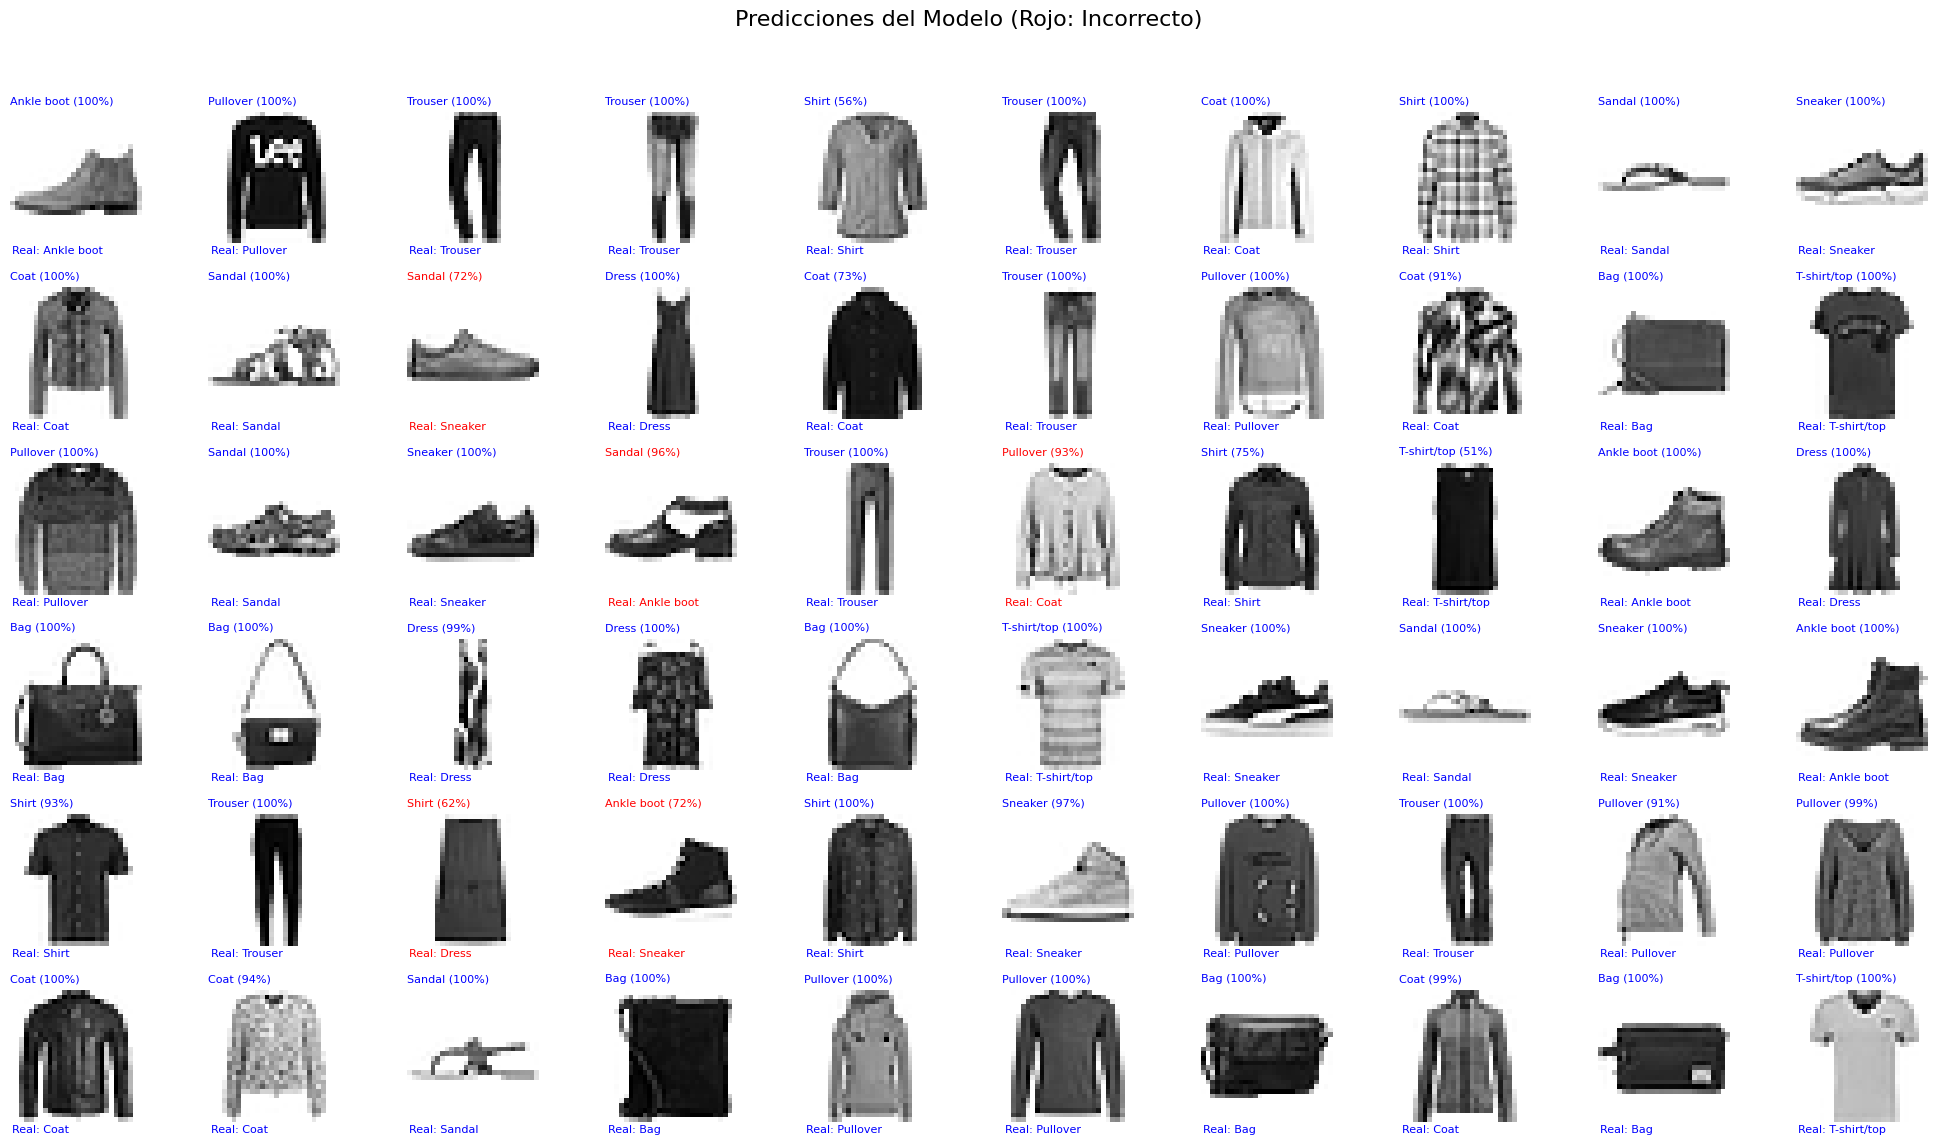

In [101]:
def plot_predictions(images, true_labels, predicted_labels, num_rows=5, num_cols=5):
    """
    Plotea un número de imágenes de prueba con sus predicciones y valores reales.
    Las predicciones correctas se muestran en azul, las incorrectas en rojo.
    """
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * num_cols, 2 * num_rows))
    plt.subplots_adjust(hspace=0.05, wspace=0.05) 

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary) 
        plt.axis('off')

        true_label = true_labels[i]
        predicted_label = predicted_labels[i]
        color = 'blue' if true_label == predicted_label else 'red'

        predicted_prob = predictions[i][predicted_label] * 100 

        plt.title(f"{class_names[predicted_label]} ({predicted_prob:.0f}%)",
                  fontsize=8, color=color, loc='left')
        plt.text(0, 28, f"Real: {class_names[true_label]}",
                 fontsize=8, color=color, verticalalignment='top') 


    plt.suptitle("Predicciones del Modelo (Rojo: Incorrecto)", fontsize=16, y=0.98) 
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()
    
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predictions = modelo3.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1) 

plot_predictions(x_test, y_test, predicted_classes, num_rows=6, num_cols=10)


# Model 4: Transfer learning con RestNet

In [82]:
x_train_expanded = np.expand_dims(x_train_split, axis=-1)
x_val_expanded = np.expand_dims(x_val, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)


TARGET_SIZE = (32, 32)

x_train_expanded = tf.image.resize(x_train_expanded, TARGET_SIZE).numpy()
x_val_expanded = tf.image.resize(x_val_expanded, TARGET_SIZE).numpy()
x_test_expanded = tf.image.resize(x_test_expanded, TARGET_SIZE).numpy()

x_train_expanded = np.repeat(x_train_expanded, 3, axis=-1)
x_val_expanded = np.repeat(x_val_expanded, 3, axis=-1)
x_test_expanded = np.repeat(x_test_expanded, 3, axis=-1)

In [79]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3))
x = base_model(inputs, training=False) # training=False para que Bat
x = base_model(inputs, training=False)
# Añadir capas personalizadas para clasificación
x = layers.GlobalAveragePooling2D()(x) # Reduce las dimensiones espaciales
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x) # Dropout para regularización
outputs = layers.Dense(10, activation='softmax')(x) # 10 clases para Fashion MNIST

modelo4 = models.Model(inputs, outputs)

In [80]:
modelo4.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo4.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,851,786 (90.99 MB)

 Trainable params: 263,818 (1.01 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

In [81]:
modelo4.fit(x_train_expanded,
            y_train_split,
            epochs=10, 
            batch_size=16, 
            validation_data=(x_val_expanded, y_val))

Epoch 1/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.7031 - loss: 0.8283 - val_accuracy: 0.6647 - val_loss: 1.1007
Epoch 2/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7699 - loss: 0.6276 - val_accuracy: 0.5772 - val_loss: 1.1856
Epoch 3/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7800 - loss: 0.6061 - val_accuracy: 0.6464 - val_loss: 1.2650
Epoch 4/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7923 - loss: 0.5802 - val_accuracy: 0.6225 - val_loss: 1.1158
Epoch 5/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7984 - loss: 0.5626 - val_accuracy: 0.5625 - val_loss: 1.8125
Epoch 6/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7975 - loss: 0.5651 - val_accuracy: 0.6684 - val_loss: 1.0348
Epoch 7/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8000 - loss: 0.5471 - val_accuracy: 0.6103 - val_loss: 1.3111
Epoch 8/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8045 - loss: 

In [83]:
loss, acc = modelo4.evaluate(x_test_expanded, y_test, verbose=0)
print(f"\n✅ Precisión final antes de refinamiento: {acc * 100:.2f}%")


✅ Precisión final antes de refinamiento: 70.21%


In [89]:
fine_tune_at = 170
print(f"Congelando las primeras {fine_tune_at} capas del modelo base...")
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

modelo4.compile(optimizer=Adam(learning_rate=0.00001), # Tasa de aprendizaje muy baja
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelo4.summary()

Congelando las primeras 170 capas del modelo base...


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,851,786 (90.99 MB)

 Trainable params: 263,818 (1.01 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

In [91]:
modelo4.fit(x_train_expanded,
            y_train_split,
            epochs=10, 
            batch_size=16, 
            validation_data=(x_val_expanded, y_val))

Epoch 1/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.8177 - loss: 0.5074 - val_accuracy: 0.8423 - val_loss: 0.4483
Epoch 2/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8234 - loss: 0.4905 - val_accuracy: 0.8425 - val_loss: 0.4484
Epoch 3/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8241 - loss: 0.4939 - val_accuracy: 0.8429 - val_loss: 0.4457
Epoch 4/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8223 - loss: 0.4955 - val_accuracy: 0.8439 - val_loss: 0.4446
Epoch 5/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8239 - loss: 0.4884 - val_accuracy: 0.8431 - val_loss: 0.4443
Epoch 6/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8235 - loss: 0.4896 - val_accuracy: 0.8419 - val_loss: 0.4452
Epoch 7/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8214 - loss: 0.4978 - val_accuracy: 0.8443 - val_loss: 0.4444
Epoch 8/10
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8224 - loss: 

In [92]:
loss, acc = modelo4.evaluate(x_test_expanded, y_test, verbose=0)
print(f"\n✅ Precisión final antes de refinamiento: {acc * 100:.2f}%")


✅ Precisión final antes de refinamiento: 82.64%
